In [2]:
!pip install ipywidgets seaborn


  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/22/2d/9c0b76f2f9cc0ebede1b9371b6f317243028ed60b90705863d493bae622e/ipywidgets-8.1.5-py3-none-any.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=4.0.12 from https://files.pythonhosted.org/packages/21/02/88b65cc394961a60c43c70517066b6b679738caf78506a5da7b88ffcb643/widgetsnbextension-4.0.13-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab-widgets~=3.0.12 from https://files.pythonhosted.org/packages/a9/93/858e87edc634d628e5d752ba944c2833133a28fa87bb093e6832ced36a3e/jupyterlab_widgets-3.0.13-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.4 from https://files.pythonhosted.org/packages/d2/92/c2b9464a0562feb6ae780

DEPRECATION: Loading egg at c:\apps\python\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the CSV file



ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import pandas as pd

df = pd.read_csv('Housing_Price_Data.csv')  # Replace with the actual file name after upload
print(df.info())  # Check the data structure


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import ipywidgets as widgets
from IPython.display import display

# Load the dataset (replace 'Housing_Price_Data.csv' with the actual file name if different)
df = pd.read_csv('Housing_Price_Data.csv')

# Check the first few rows of the dataset
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Fill missing values for numerical columns with the mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Fill missing values for categorical columns with the mode (most frequent value)
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

def display_histogram(variable):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[variable], bins=20, kde=True)
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

# Check if there are still any missing values
print(df.isnull().sum())


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
# Central Tendency: Mean, Median, Mode
mean_values = df[numerical_columns].mean()
median_values = df[numerical_columns].median()
mode_values = df[numerical_columns].mode().iloc[0]  # Mode returns multiple rows, take the first

# Variability: Standard Deviation, Variance, Range
std_values = df[numerical_columns].std()
var_values = df[numerical_columns].var()
range_values = df[numerical_columns].max() - df[numerical_columns].min()

# Percentiles (25th, 50th, 75th)
percentiles = df[numerical_columns].quantile([0.25, 0.50, 0.75])

# Display the calculated statistics
print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Mode Values:\n", mode_values)
print("Standard Deviation:\n", std_values)
print("Variance:\n", var_values)
print("Range Values:\n", range_values)
print("Percentiles:\n", percentiles)


Mean Values:
 price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64
Median Values:
 price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64
Mode Values:
 price        3500000.0
area            6000.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
Name: 0, dtype: float64
Standard Deviation:
 price        1.870440e+06
area         2.170141e+03
bedrooms     7.380639e-01
bathrooms    5.024696e-01
stories      8.674925e-01
parking      8.615858e-01
dtype: float64
Variance:
 price        3.498544e+12
area         4.709512e+06
bedrooms     5.447383e-01
bathrooms    2.524757e-01
stories      7.525432e-01
parking      7.423300e-01
dtype: float64
Range Values:
 price        11550000
area            14550
bedrooms            5
bathrooms      

In [ ]:
# Create a dropdown for selecting a numerical variable
dropdown = widgets.Dropdown(
    options=numerical_columns,
    description='Select variable:',
    disabled=False,

# Link the dropdown to the display function
widgets.interact(display_histogram, variable=dropdown)

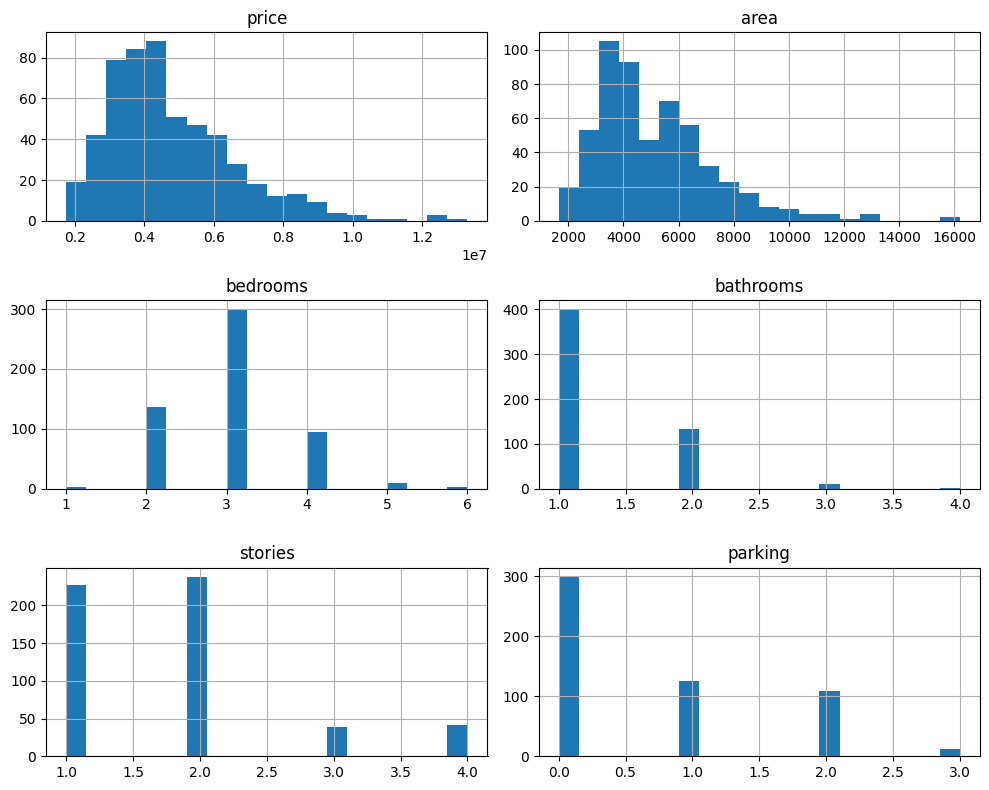

In [ ]:
# Histograms for numerical variables
df[numerical_columns].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()


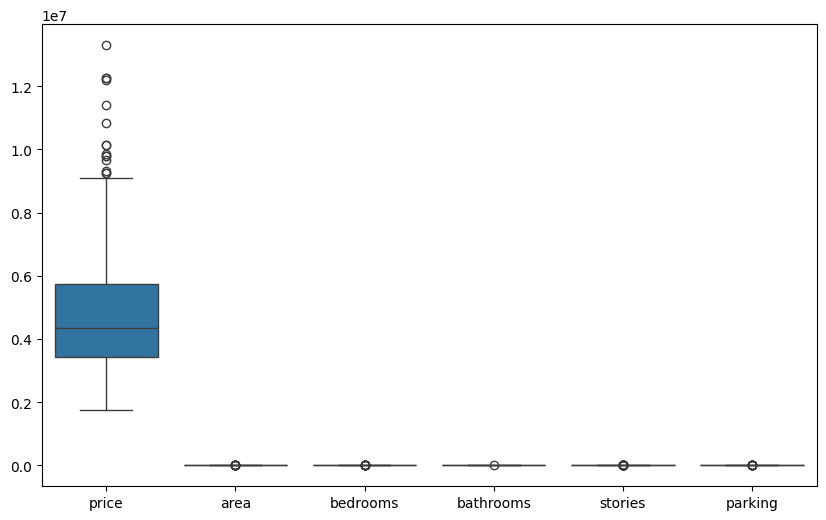

In [ ]:
# Box plot to visualize outliers and spread
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns])
plt.show()


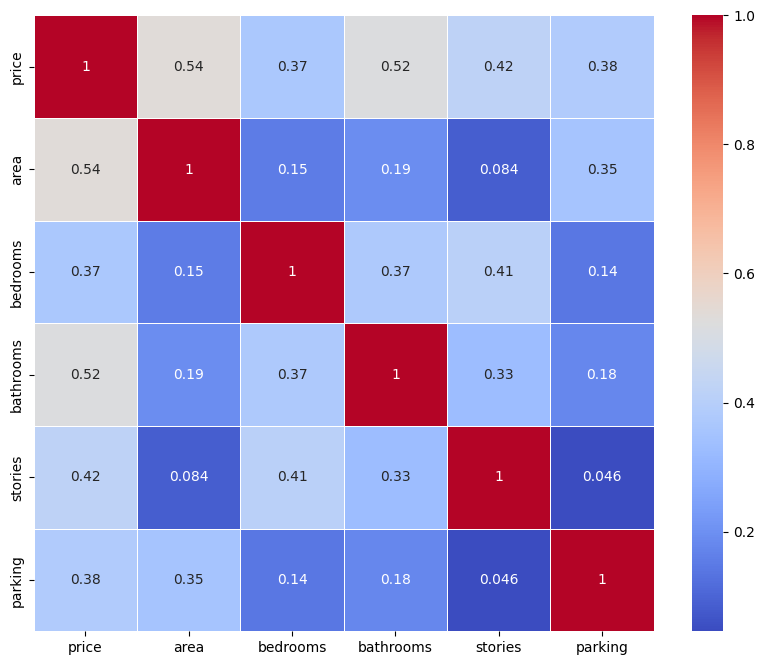

In [ ]:
# Correlation matrix
corr_matrix = df[numerical_columns].corr()

# Heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [7]:
def conclusion():
    print("\nConclusion:")
    print("By visualizing the histograms, we gain insights into the distribution of the selected variables.")
    print("Central tendency measures like mean and median provide insights into the average values, while standard deviation and range show the spread of data.")
    print("Understanding the distribution can help in identifying outliers, data skewness, and informing data preprocessing steps for further analysis.")

conclusion()


Conclusion:
By visualizing the histograms, we gain insights into the distribution of the selected variables.
Central tendency measures like mean and median provide insights into the average values, while standard deviation and range show the spread of data.
Understanding the distribution can help in identifying outliers, data skewness, and informing data preprocessing steps for further analysis.
